<a href="https://colab.research.google.com/github/jumafernandez/clasificacion_correos/blob/main/tesis/notebooks/02-analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de datos: Dataset consolidado

__Carrera:__ Maestria en Inteligencia de datos orientada a Big Data de la Universidad Nacional de La Plata.

___Título de la Tesis:___ Clasificación automática de correos electrónicos

___Autor:___ Juan Manuel Fernandez

___Director:___ Marcelo Errecalde


__Objetivo:__ En esta notebook se plantean algunos recursos de análisis exploratorio para entender los datos ya consolidados en las 16 clases y con las etiquetas corregidas.

## 0. Misceláneos:

### Descarga de librerias necesarias

In [ ]:
!pip install requests
!pip install wget

### Se carga el dataset

Se carga el dataset en un dataframe:

In [ ]:
# Descargo los correos ya etiquetados
from os import path
import pandas as pd

if not (path.exists('correos-train-jaiio-80.csv')):
    !wget https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/data/50jaiio/consolidados/correos-train-jaiio-80.csv

if not (path.exists('correos-test-jaiio-20.csv')):
    !wget https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/data/50jaiio/consolidados/correos-test-jaiio-20.csv

# Cargo todo el conjunto de correos en dos dataframes
correos_train = pd.read_csv('correos-train-jaiio-80.csv')
correos_test = pd.read_csv('correos-test-jaiio-20.csv')

--2021-10-29 09:13:49--  https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/data/50jaiio/consolidados/correos-train-jaiio-80.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238811 (233K) [text/plain]
Saving to: ‘correos-train-jaiio-80.csv’

correos-train-jaiio 100%[===================>] 233.21K  --.-KB/s    in 0.04s   

2021-10-29 09:13:49 (6.49 MB/s) - ‘correos-train-jaiio-80.csv’ saved [238811/238811]

--2021-10-29 09:13:49--  https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/data/50jaiio/consolidados/correos-test-jaiio-20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercon

In [ ]:
import pandas as pd

# Cargo TODOS los correos en un dataframe
correos = pd.concat([correos_train, correos_test], ignore_index=True)

correos.shape

(1000, 24)

In [ ]:
correos.head()

,consulta,dia_semana,semana_del_mes,mes,cuatrimestre,anio,hora_discretizada,dni_discretizado,legajo_discretizado,posee_legajo,posee_telefono,carrera_valor,proveedor_correo,cantidad_caracteres,proporcion_mayusculas,proporcion_letras,cantidad_tildes,cantidad_palabras,cantidad_palabras_cortas,proporcion_palabras_distintas,frecuencia_signos_puntuacion,cantidad_oraciones,utiliza_codigo_asignatura,clase
0,quería saber por qué no puedo acceder al bolet...,6,2,3,1,2019,2,7,4,1,1,3,4,107,0.0,0.775701,3,21,12,0.952381,0.000000,1,0,Boleto Universitario
1,no puedo reseterar mi clave de acceso al siste...,4,2,12,2,2015,0,2,1,1,1,5,6,419,0.0,0.809069,0,78,45,0.717949,0.007160,1,0,Problemas con la Clave
2,me dice que ya tengo el beneficio de la sube y...,1,2,4,1,2019,3,8,4,1,1,3,6,96,0.0,0.781250,1,22,15,0.863636,0.000000,1,0,Boleto Universitario
3,"buenos días, quería consultar cuando me puedo ...",3,4,10,2,2018,1,4,2,1,1,3,6,410,0.0,0.819512,5,70,34,0.728571,0.012195,2,0,Cursadas
4,buenas tardes quiero volver a estudiar en la f...,2,1,2,1,2019,0,2,0,0,1,54,6,175,0.0,0.811429,1,32,16,0.875000,0.011429,1,0,Cambio de Carrera


## 1. EDA (Análisis exploratorio de datos)

Se generan gráficos para el análisis exploratorio. Primero se cargan las librerías gráficas:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib.pyplot as plt

In [ ]:
correos.columns

Index(['consulta', 'dia_semana', 'semana_del_mes', 'mes', 'cuatrimestre',
       'anio', 'hora_discretizada', 'dni_discretizado', 'legajo_discretizado',
       'posee_legajo', 'posee_telefono', 'carrera_valor', 'proveedor_correo',
       'cantidad_caracteres', 'proporcion_mayusculas', 'proporcion_letras',
       'cantidad_tildes', 'cantidad_palabras', 'cantidad_palabras_cortas',
       'proporcion_palabras_distintas', 'frecuencia_signos_puntuacion',
       'cantidad_oraciones', 'utiliza_codigo_asignatura', 'clase'],
      dtype='object')

In [ ]:
correos.clase.value_counts()

Boleto Universitario                   241
Ingreso a la Universidad               168
Requisitos de Ingreso                  122
Problemas con la Clave                 114
Cursadas                                94
Pedido de Certificados                  74
Reincorporación                         54
Situación Académica                     28
Exámenes                                23
Consulta por Legajo                     18
Consulta sobre Título Universitario     13
Cambio de Carrera                       13
Consulta por Equivalencias              13
Cambio de Comisión                      10
Datos Personales                         8
Simultaneidad de Carreras                7
Name: clase, dtype: int64

### 1.1 Gráfico del día de la semana

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cantidad de correos')

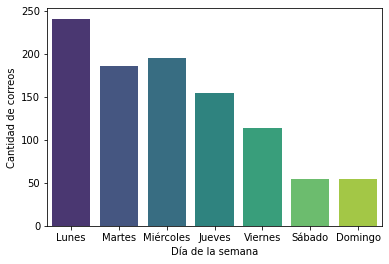

In [ ]:
dias_letras = numpy.array(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
dia_numeros = list(correos['dia_semana'])

dia_letras_correos = dias_letras[dia_numeros]

sns.countplot(dia_letras_correos, 
              palette="viridis", 
              order=dias_letras);
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de correos")



### 1.2 Gráfico la semana del mes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cantidad de correos')

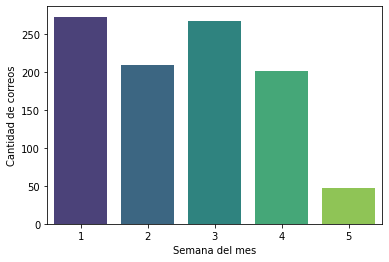

In [ ]:
semana_numeros = list(correos['semana_del_mes'])

sns.countplot(semana_numeros, 
              palette="viridis"); 
plt.xlabel("Semana del mes")
plt.ylabel("Cantidad de correos")

### 1.3 Mes de la consulta

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cantidad de correos')

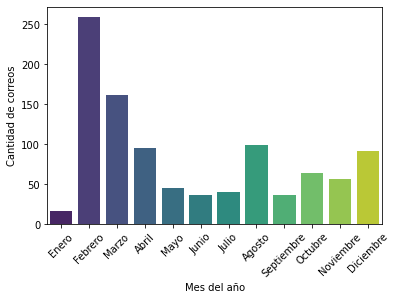

In [ ]:
mes_letras = numpy.array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

correos['mes'] = correos['mes']-1
mes_numeros = list(correos['mes'])

mes_letras_correos = mes_letras[mes_numeros]

sns.countplot(mes_letras_correos,
              palette="viridis", 
              order=mes_letras);
plt.xlabel("Mes del año")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de correos")


### 1.4 Año de la consulta

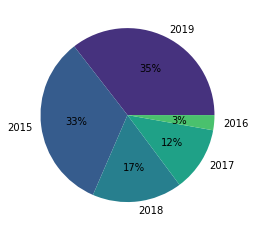

In [ ]:
#define data
data = list(correos['anio'].value_counts().reset_index(drop=True))
labels = list(pd.Series(correos['anio'].unique()))

#define Seaborn color palette to use
colors = sns.color_palette('viridis')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### 1.5 Serie de tiempo con la base de consultas completa

In [ ]:
from google.colab import drive
drive.mount('drive')
!cp "drive/My Drive/correos-procesados.csv" correos-procesados.csv

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# Cargo los datos de TODA LA SERIE en un df
df_correos_todos = pd.read_csv('correos-procesados.csv')
df_correos_todos.shape

(19776, 10)

In [ ]:
# Se eliminan los datos que no son fechas
correos_por_fecha = pd.to_datetime(df_correos_todos['fecha'], errors='coerce')

In [ ]:
# Se agrupan por mes los correos
correos_por_mes = correos_por_fecha.groupby(correos_por_fecha.dt.to_period('Q')).agg('count')

In [ ]:
correos['fecha'] = '01-' + correos['mes'].astype(str) + '-' + correos['anio'].astype(str)

correos_et_por_fecha = pd.to_datetime(correos['fecha'], errors='coerce')

# Se agrupan por mes los correos
correos_et_por_mes = correos_et_por_fecha.groupby(correos_et_por_fecha.dt.to_period('Q')).agg('count')

(array([735234., 735507., 735689., 735780., 735872., 735964., 736055.,
        736146., 736238., 736330., 736420., 736511., 736603., 736695.,
        736785., 736876., 736968., 737060., 737150., 737241., 737333.]),
 <a list of 21 Text major ticklabel objects>)

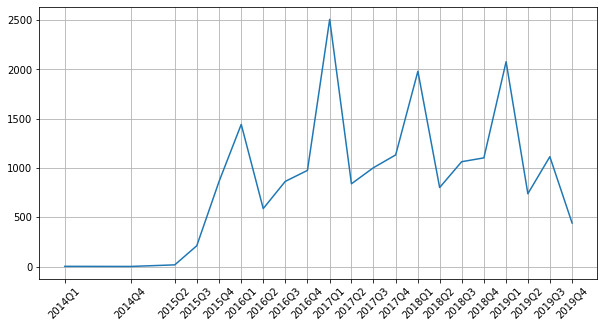

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(correos_por_mes.index.array.to_timestamp(), 
         correos_por_mes.values, 
         linestyle = 'solid')

plt.xticks(correos_por_mes.index.array.to_timestamp(), correos_por_mes.index)
plt.xticks(rotation=45)

In [ ]:
colors = sns.color_palette('viridis')

colors.as_hex



<bound method _ColorPalette.as_hex of [(0.275191, 0.194905, 0.496005), (0.212395, 0.359683, 0.55171), (0.153364, 0.497, 0.557724), (0.122312, 0.633153, 0.530398), (0.288921, 0.758394, 0.428426), (0.626579, 0.854645, 0.223353)]>

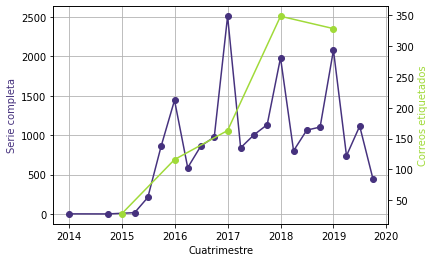

<Figure size 720x360 with 0 Axes>

In [ ]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# make a plot
plt.figure(figsize=(10, 5))
ax.grid()
ax.plot(correos_por_mes.index.array.to_timestamp(), 
         correos_por_mes.values, 
         linestyle = 'solid',
         color=(0.275191, 0.194905, 0.496005), 
         marker="o")

# set x-axis label
ax.set_xlabel("Cuatrimestre")

#plt.xticks(correos_por_mes.index.array.to_timestamp(), correos_por_mes.index)
#plt.xticks(rotation=45)

# set y-axis label
ax.set_ylabel("Serie completa",color=(0.275191, 0.194905, 0.496005))

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(correos_et_por_mes.index.array.to_timestamp(), 
         correos_et_por_mes.values, 
         linestyle = 'solid',
         color=(0.626579, 0.854645, 0.223353), 
         marker="o")

ax2.set_ylabel("Correos etiquetados", color=(0.626579, 0.854645, 0.223353))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

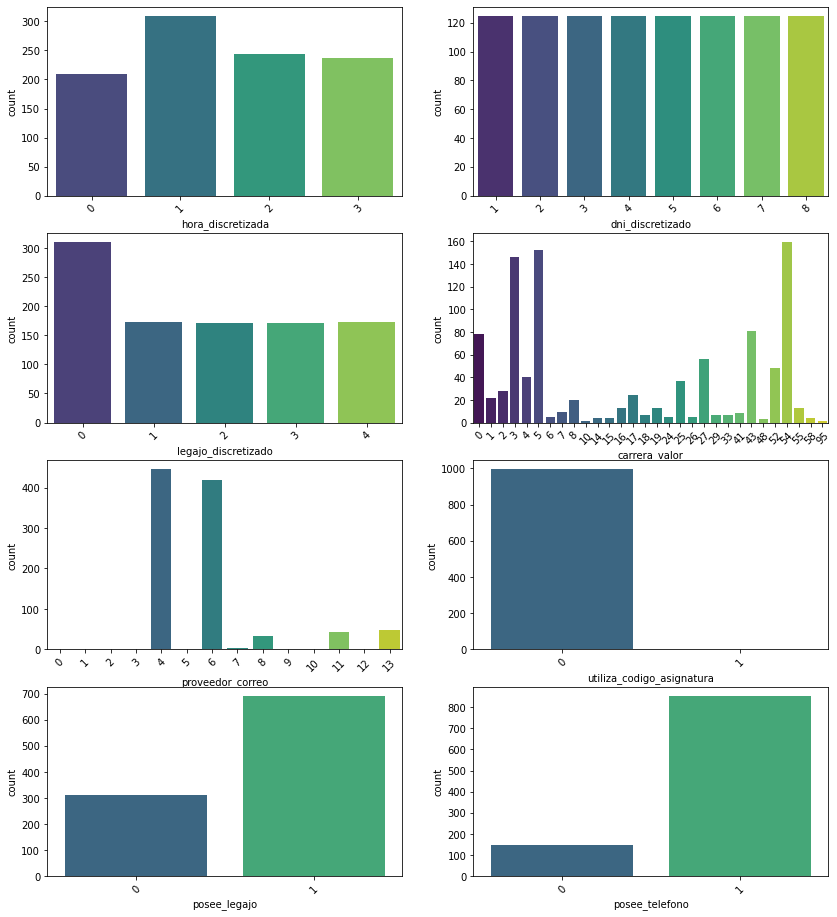

In [ ]:
categorical = ['hora_discretizada', 'dni_discretizado', 'legajo_discretizado', 'carrera_valor', 'proveedor_correo', 'utiliza_codigo_asignatura', 'posee_legajo', 'posee_telefono']

fig, ax = plt.subplots(4, 2, figsize=(14, 16))
plt.ylabel("Cantidad de correos")
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(correos[variable], ax=subplot, palette="viridis")
    print()
    for label in subplot.get_xticklabels():
        label.set_rotation(45)


In [ ]:
sum(correos.utiliza_codigo_asignatura)

5

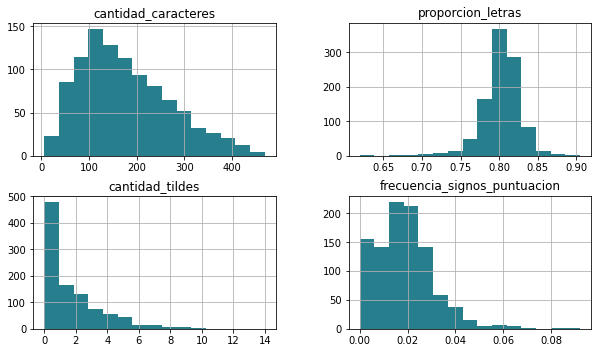

In [ ]:
continuos_1 = ['cantidad_caracteres', 'proporcion_letras', 'cantidad_tildes', 
               'frecuencia_signos_puntuacion']

correos[continuos_1].hist(bins=15, figsize=(10, 12), layout=(4, 2), color=(0.153364, 0.497, 0.557724));

In [ ]:
colors.as_hex

<bound method _ColorPalette.as_hex of [(0.275191, 0.194905, 0.496005), (0.212395, 0.359683, 0.55171), (0.153364, 0.497, 0.557724), (0.122312, 0.633153, 0.530398), (0.288921, 0.758394, 0.428426), (0.626579, 0.854645, 0.223353)]>

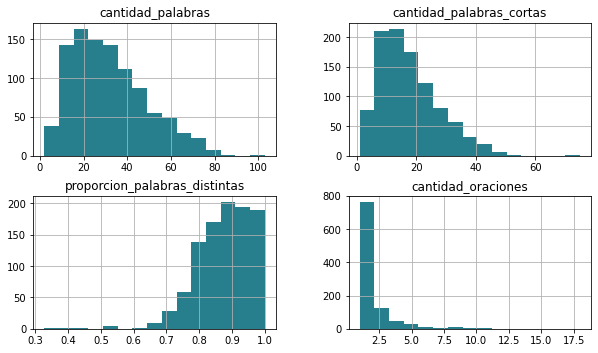

In [ ]:
continuos_2 = ['cantidad_palabras', 'cantidad_palabras_cortas', 
             'proporcion_palabras_distintas', 'cantidad_oraciones']

correos[continuos_2].hist(bins=15, figsize=(10, 12), layout=(4, 2), color=(0.153364, 0.497, 0.557724));

Text(0, 0.5, 'Cantidad de caracteres')

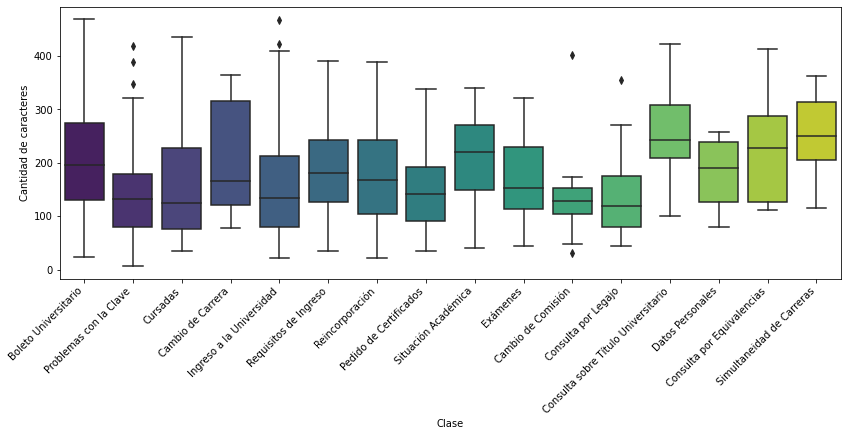

In [ ]:
plt.figure(figsize=(14, 5))

sns.boxplot(x="clase", 
            y="cantidad_caracteres",
            data=correos, 
            palette="viridis")

plt.xlabel("Clase")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Cantidad de caracteres")


### 5.1 Histograma de Clases

A continuación se plantea una función para graficar el histograma de clases (gráfico de barras con frecuencia observada por clase):


			Distribución de clases para el Total dataset


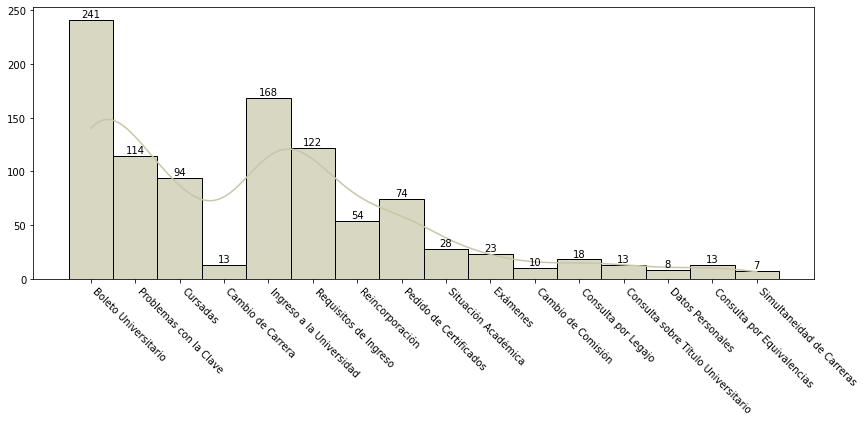

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

def hist_clases(serie_clases, desc_plot, filename_plot):
  """
  Se plotean las clases en función de la distribución de la frecuencia
  observada en cada dataset
  """

  # Set figure size
  plt.figure(figsize=(14,5))

  ax = sns.histplot(serie_clases, kde=True, stat='count', 
                    bins=serie_clases.unique(), binwidth=0.06, 
                    color='#c8c6a7', alpha=0.7)

  ax.set_xticklabels(serie_clases.unique(),
                    rotation=-45, 
                    horizontalalignment='left', fontweight='light')

  for p in ax.patches:
      ax.annotate(f'{p.get_height():.0f}\n',
                  (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='center', color='black')

  # Quito el nombre de los ejes (de forma rústica)
  plt.xlabel('', fontsize=12)
  plt.ylabel('', fontsize=12)

  # Guardo el plot en un png
  plt.savefig(filename_plot, optimize=True, transparent=True, bbox_inches = 'tight')

  # Muestro el gráfico con una descripción
  print(f'\t\t\tDistribución de clases para el {desc_plot}')
  plt.show()  

hist_clases(correos['clase'], 'Total dataset', 'histograma_total.png')

In [ ]:
correos.shape

(1000, 25)

## 6. Train/Test dataset

Analizamos graficamente la separación de datos entre train y test:

# Referencias:
1. [Presentación](0) de apoyo al [Proyecto de Investigación](1) "Clasificación automática de correos electrónicos".

2. Clasificacion de textos por etiquetado de palabras: [short paper](2).

3. [API](3) del diccionario Collins.

4. [Funciones](4) de la [API](3) del diccionario Collins.

5. Librería [clusteval](5) para la evaluación KMeans.

[0]:https://docs.google.com/presentation/d/1-gdZ3dUI2pAfXM6Bgau53U7G4g2Bkv6DlxGESnu7A20/edit?usp=sharing 
[1]:https://github.com/jumafernandez/clasificacion_correos 
[2]:https://www.aaai.org/Papers/AAAI/2004/AAAI04-068.pdf
[3]:https://pypi.org/project/collins-client/
[4]:https://api.collinsdictionary.com/api/v1/documentation/html
[5]:https://clusteval.sdu.dk/1/mains